In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
data_path = '../data/postprocessed/'

mapping_table = {
    'backprop': 'Backpropagation algorithm',
    'gaussian': 'Gaussian Elimination',
    'gpu': 'Stream Cluster',
    'lenet5': 'Lenet5'
}

data_sheet = pd.DataFrame()
for sampling_mode in os.listdir(data_path):
    if sampling_mode == 'Serialized':
        csv_folder = os.path.join(data_path, sampling_mode)
        for file_name in os.listdir(csv_folder):
            csv_full_path = os.path.join(csv_folder, file_name)

            df = pd.read_csv(csv_full_path)
            df['Sampling_mode'] = sampling_mode
            df['Sampling_period'] = int(file_name.split('_')[1])
            df['App_name'] = mapping_table[file_name.split('_')[-1].split('.')[0]]

            data_sheet=pd.concat([data_sheet, df], ignore_index=True)

: 

In [3]:
# data_sheet['Sampling_mode'].value_counts()
# data_sheet['App_name'].value_counts()
# data_sheet['Sampling_period'].value_counts()

In [4]:
data_sheet.columns

Index(['functionName', 'pcOffset', 'barrier', 'barrier_not_issued',
       'branch_resolving', 'branch_resolving_not_issued', 'dispatch_stall',
       'dispatch_stall_not_issued', 'drain', 'drain_not_issued', 'imc_miss',
       'imc_miss_not_issued', 'lg_throttle', 'lg_throttle_not_issued',
       'long_scoreboard', 'long_scoreboard_not_issued', 'math_pipe_throttle',
       'math_pipe_throttle_not_issued', 'mio_throttle',
       'mio_throttle_not_issued', 'misc', 'misc_not_issued', 'no_instructions',
       'no_instructions_not_issued', 'not_selected', 'selected',
       'short_scoreboard', 'short_scoreboard_not_issued', 'wait',
       'wait_not_issued', 'Sampling_mode', 'Sampling_period', 'App_name',
       'tex_throttle', 'tex_throttle_not_issued'],
      dtype='object')

In [5]:
grouped_data = data_sheet.groupby(['Sampling_mode', 'App_name', 'Sampling_period', 'functionName'])['pcOffset']\
        .max()\
        .reset_index()\
        .sort_values(by=['Sampling_mode', 'App_name', 'Sampling_period', 'functionName'])

Text(0, 0.5, 'Number of PC sampling instances')

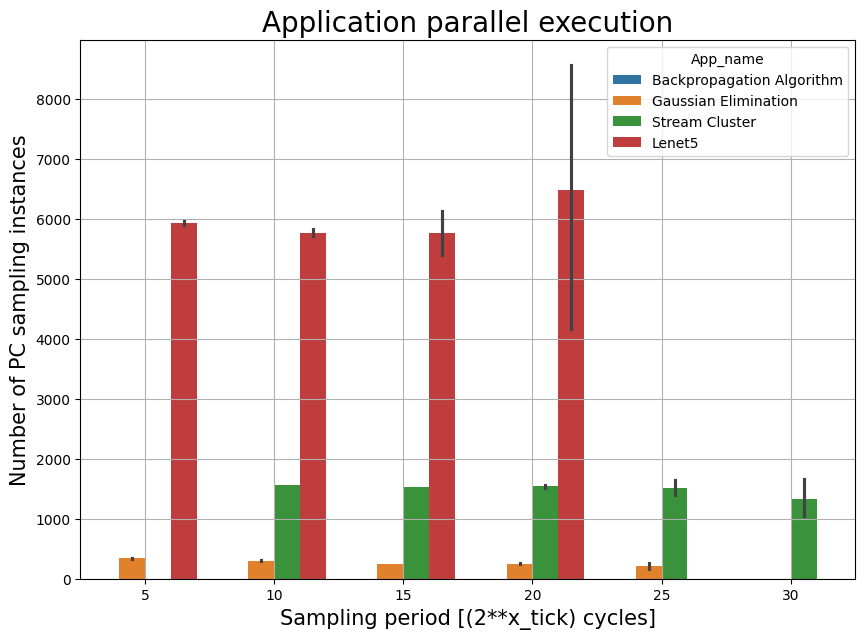

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
hue_order = ['Backpropagation Algorithm', 'Gaussian Elimination', 'Stream Cluster', 'Lenet5']

sns.barplot(data_sheet, x='Sampling_period', y='pcOffset', hue='App_name', hue_order=hue_order, ax = ax)
ax.grid()
ax.set_title('Application parallel execution', fontsize=20)
ax.set_xlabel('Sampling period [(2**x_tick) cycles]',fontsize=15)
ax.set_ylabel('Number of PC sampling instances',fontsize=15)

In [4]:
print(len(data_sheet))
pc_column_labels = ['barrier', 'barrier_not_issued',
                     'branch_resolving', 'branch_resolving_not_issued', 'dispatch_stall',
                     'dispatch_stall_not_issued', 'drain', 'drain_not_issued', 'imc_miss',
                     'imc_miss_not_issued', 'lg_throttle', 'lg_throttle_not_issued',
                     'long_scoreboard', 'long_scoreboard_not_issued', 'math_pipe_throttle',
                     'math_pipe_throttle_not_issued', 'mio_throttle',
                     'mio_throttle_not_issued', 'misc', 'misc_not_issued', 'no_instructions',
                     'no_instructions_not_issued', 'not_selected', 'selected',
                     'short_scoreboard', 'short_scoreboard_not_issued', 'wait',
                     'wait_not_issued',
                     'tex_throttle', 'tex_throttle_not_issued']
# filtered_df = data_sheet.groupby(['App_name', 'Sampling_period'])[pc_column_labels].mean().reset_index()

df_long = pd.melt(data_sheet,
                  id_vars=['App_name', 'Sampling_period'],
                  value_vars=pc_column_labels,
                  var_name='Stall reason',
                  value_name='Instance')

df_long

8476280


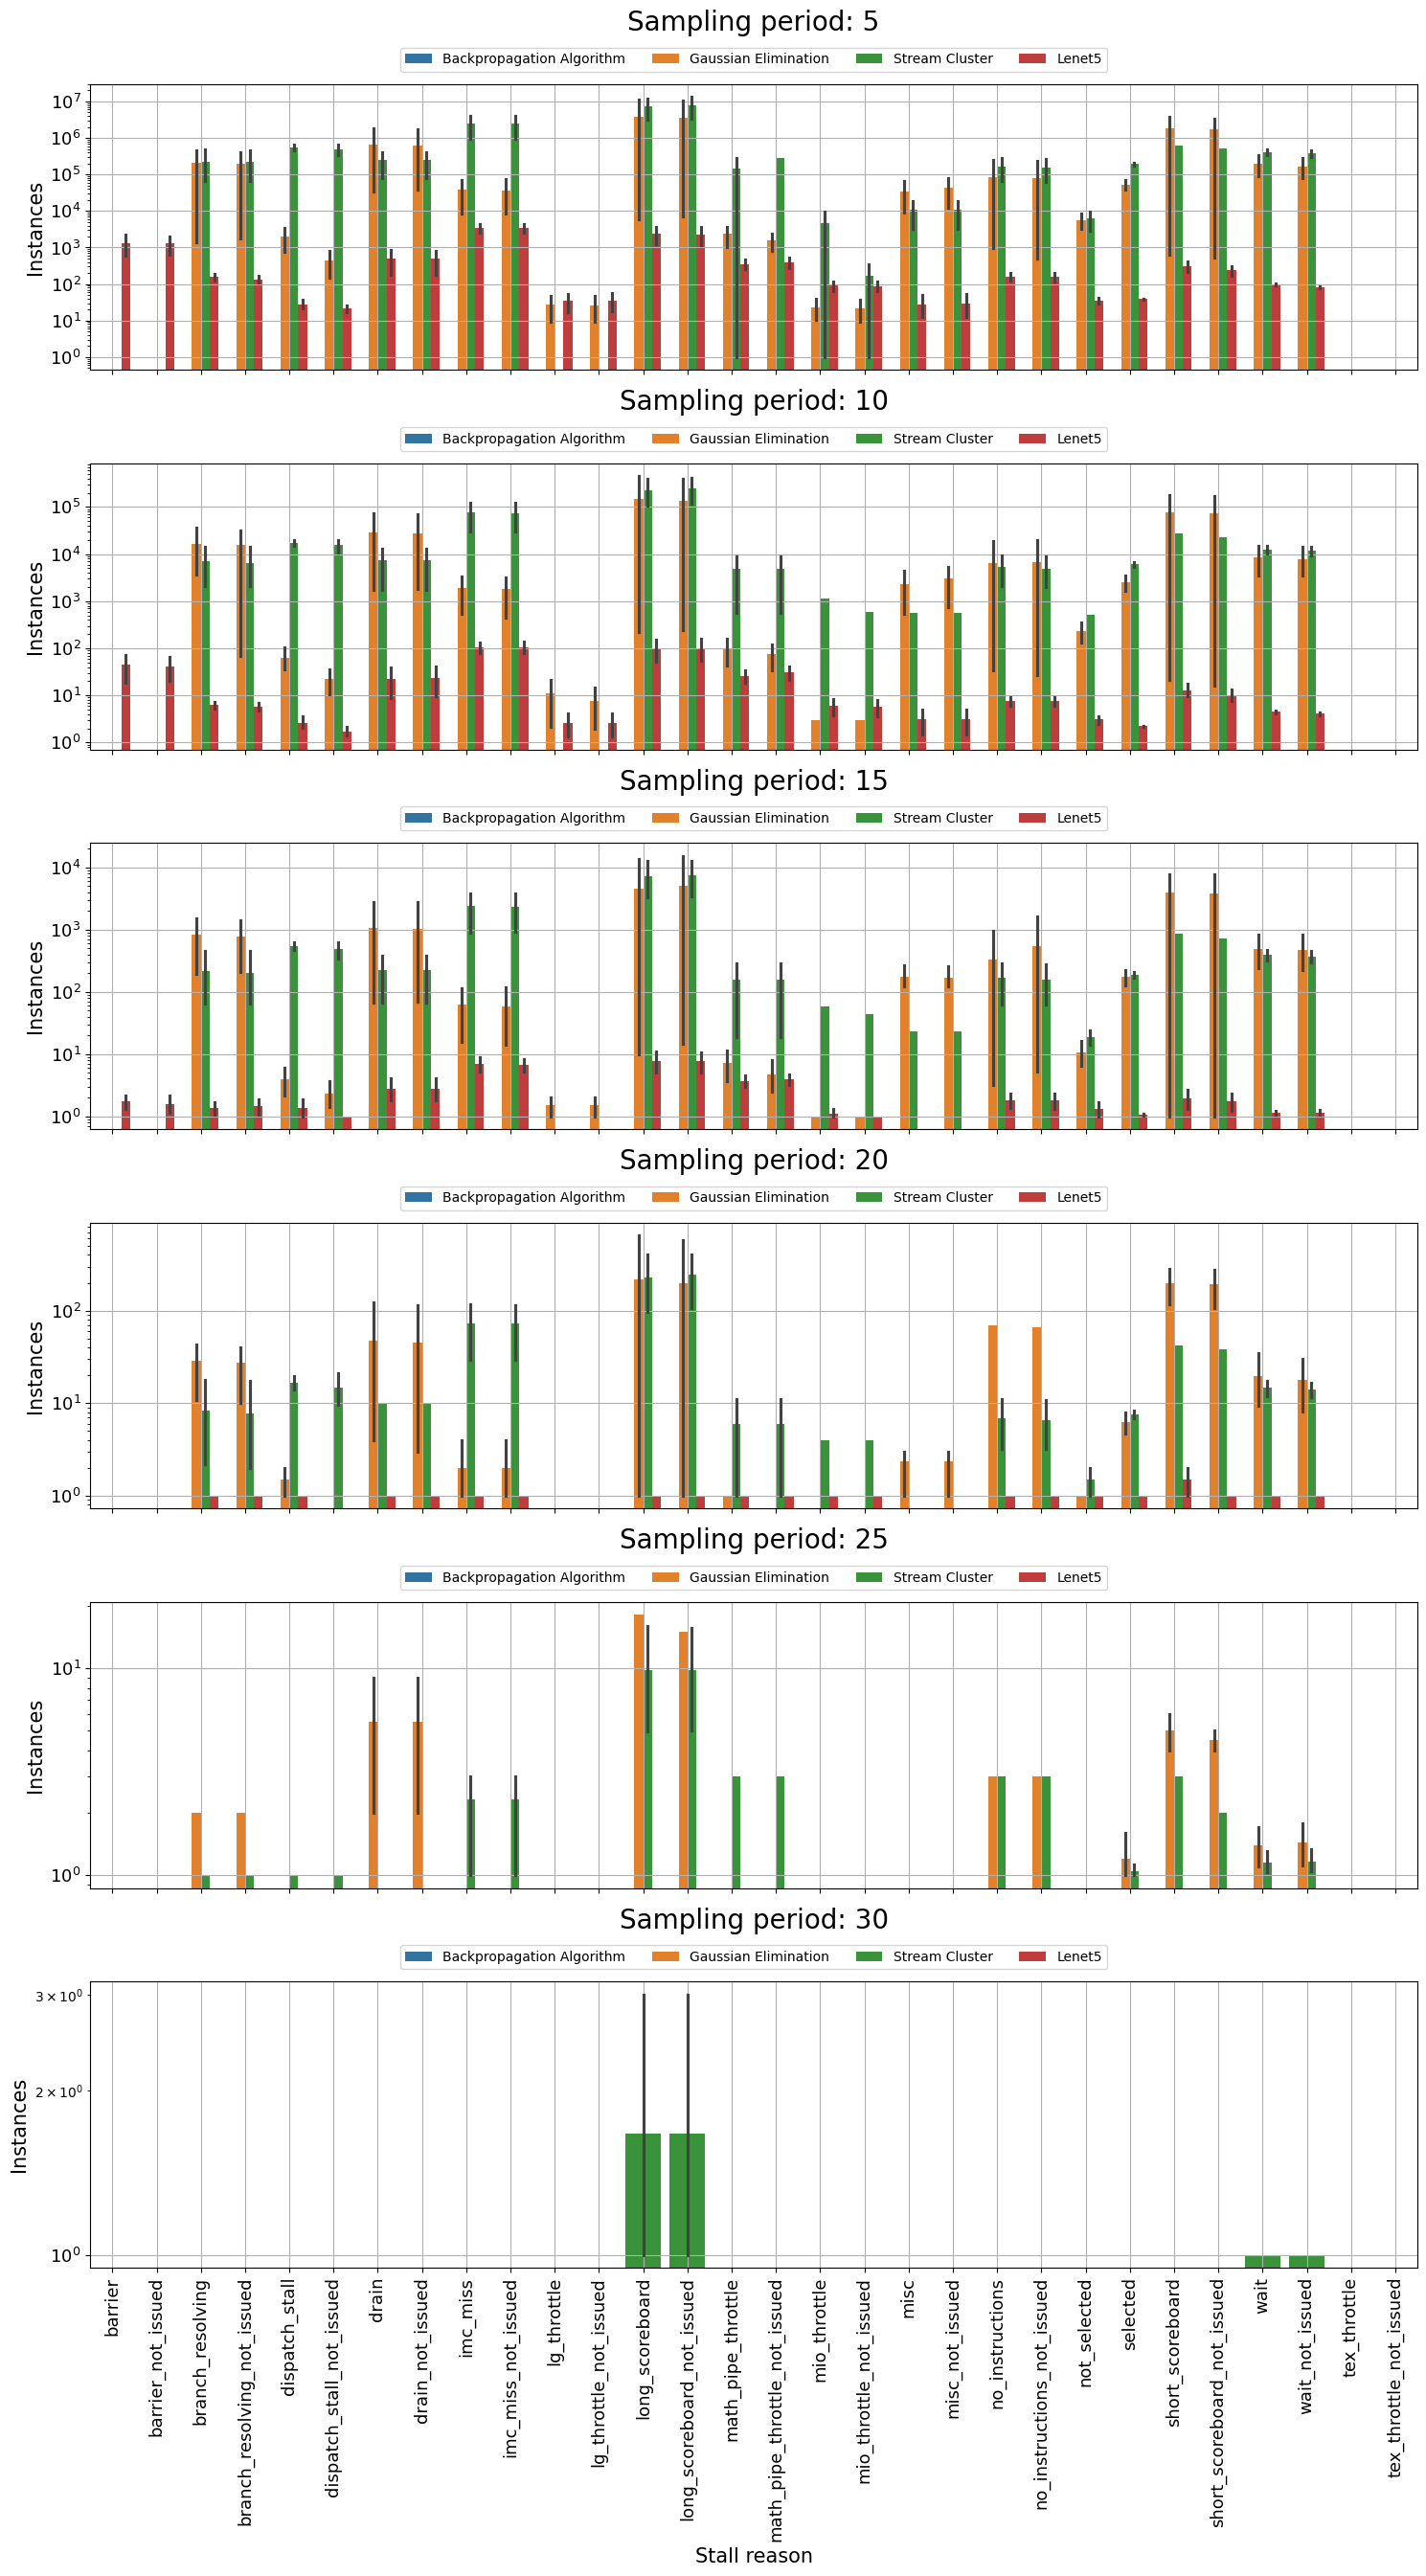

In [60]:
fig, ax = plt.subplots(6,1, figsize=(15,27))

sampling_periods = [5,10,15,20,25,30]
hue_order = ['Backpropagation Algorithm', 'Gaussian Elimination', 'Stream Cluster', 'Lenet5']

for sampling_period_idx in range(len(sampling_periods)):
    sns.barplot(data=df_long[df_long['Sampling_period']==sampling_periods[sampling_period_idx]], x='Stall reason', y='Instance',hue='App_name',ax=ax[sampling_period_idx], hue_order=hue_order)
    ax[sampling_period_idx].set_title(f"Sampling period: {sampling_periods[sampling_period_idx]}", fontsize=20, pad=40)
    ax[sampling_period_idx].grid()
    ax[sampling_period_idx].set_yscale('log')
    ax[sampling_period_idx].set_xlabel('Stall reason', fontsize=15)
    ax[sampling_period_idx].set_ylabel('Instances', fontsize=15)
    ax[sampling_period_idx].tick_params(axis='x', labelrotation=90, labelsize=13)
    ax[sampling_period_idx].tick_params(axis='y', labelsize=13)
    ax[sampling_period_idx].legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        ncol=4
    )
    if sampling_period_idx != 5:
        ax[sampling_period_idx].set_xticklabels([])
        ax[sampling_period_idx].set_xlabel('', fontsize=15)
plt.tight_layout()

In [61]:
print(len(data_sheet))
pc_column_labels = ['barrier', 'barrier_not_issued',
                     'branch_resolving', 'branch_resolving_not_issued', 'dispatch_stall',
                     'dispatch_stall_not_issued', 'drain', 'drain_not_issued', 'imc_miss',
                     'imc_miss_not_issued', 'lg_throttle', 'lg_throttle_not_issued',
                     'long_scoreboard', 'long_scoreboard_not_issued', 'math_pipe_throttle',
                     'math_pipe_throttle_not_issued', 'mio_throttle',
                     'mio_throttle_not_issued', 'misc', 'misc_not_issued', 'no_instructions',
                     'no_instructions_not_issued', 'not_selected', 'selected',
                     'short_scoreboard', 'short_scoreboard_not_issued', 'wait',
                     'wait_not_issued',
                     'tex_throttle', 'tex_throttle_not_issued']
# filtered_df = data_sheet.groupby(['App_name', 'Sampling_period'])[pc_column_labels].mean().reset_index()

df_long = pd.melt(data_sheet,
                  id_vars=['App_name', 'Sampling_period', 'pcOffset'],
                  value_vars=pc_column_labels,
                  var_name='Stall reason',
                  value_name='Instance')

df_long

7341


,App_name,Sampling_period,pcOffset,Stall reason,Instance
0,Lenet5,15,0,barrier,NaN
1,Lenet5,15,32,barrier,NaN
2,Lenet5,15,320,barrier,NaN
3,Lenet5,15,432,barrier,NaN
4,Lenet5,15,4176,barrier,NaN
...,...,...,...,...,...
220225,Gaussian Elimination,25,512,tex_throttle_not_issued,NaN
220226,Gaussian Elimination,25,544,tex_throttle_not_issued,NaN
220227,Gaussian Elimination,25,560,tex_throttle_not_issued,NaN
220228,Backpropagation algorithm,20,336,tex_throttle_not_issued,19.0


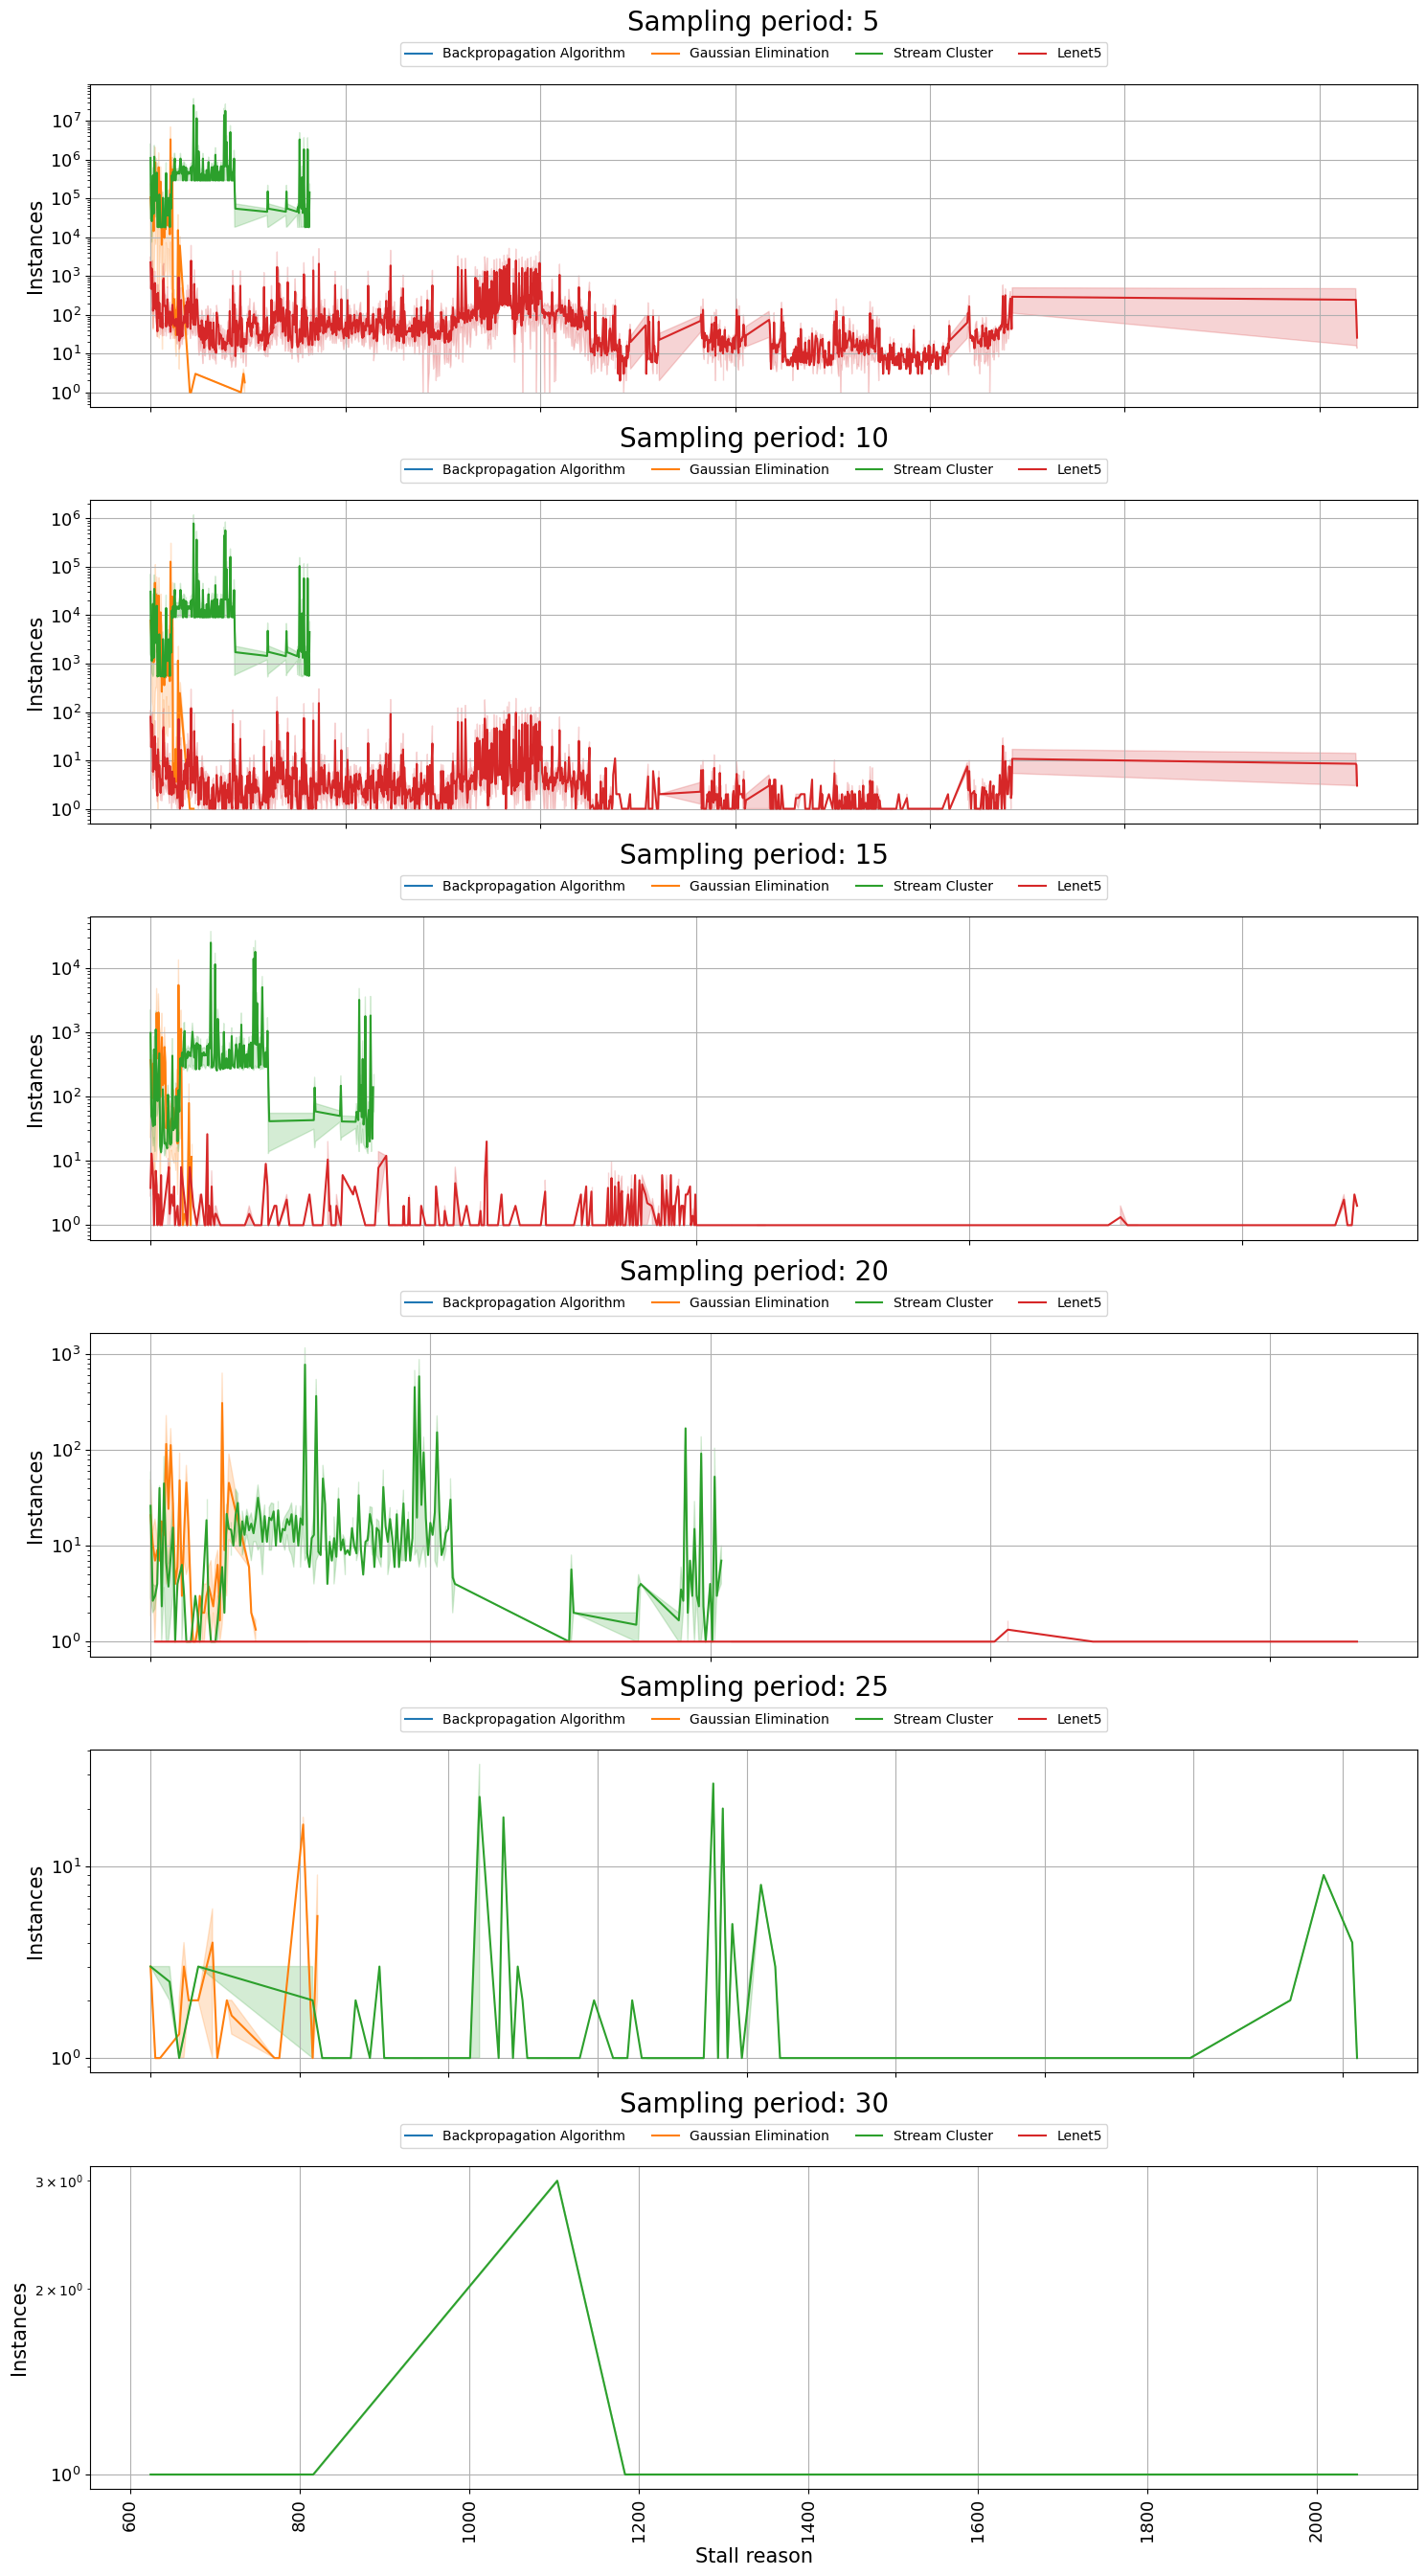

In [64]:
fig, ax = plt.subplots(6,1, figsize=(15,27))

sampling_periods = [5,10,15,20,25,30]
hue_order = ['Backpropagation Algorithm', 'Gaussian Elimination', 'Stream Cluster', 'Lenet5']

for sampling_period_idx in range(len(sampling_periods)):
    sns.lineplot(data=df_long[df_long['Sampling_period']==sampling_periods[sampling_period_idx]], x='pcOffset', y='Instance',hue='App_name',ax=ax[sampling_period_idx], hue_order=hue_order)
    ax[sampling_period_idx].set_title(f"Sampling period: {sampling_periods[sampling_period_idx]}", fontsize=20, pad=40)
    ax[sampling_period_idx].grid()
    ax[sampling_period_idx].set_yscale('log')
    ax[sampling_period_idx].set_xlabel('Stall reason', fontsize=15)
    ax[sampling_period_idx].set_ylabel('Instances', fontsize=15)
    ax[sampling_period_idx].tick_params(axis='x', labelrotation=90, labelsize=13)
    ax[sampling_period_idx].tick_params(axis='y', labelsize=13)
    ax[sampling_period_idx].legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        ncol=4
    )
    if sampling_period_idx != 5:
        ax[sampling_period_idx].set_xticklabels([])
        ax[sampling_period_idx].set_xlabel('', fontsize=15)
plt.tight_layout()

Based on this plot I would say that the PC Offset can be representative of the number of custom registers that are dedicated to the counts. 
Equivalently, it could represent the number of stall events that are collected.